<h2>Load data</h2>

In [1]:
from numpy import loadtxt
from sklearn.utils import shuffle

# load data
import pandas as pd
df = pd.read_csv("../data/flame.csv")
np_data = df.values

# split data into X and y
X = np_data[:,0:-1]
Y = np_data[:,-1]

# set seed to randomizer
seed = 7

# shuffle data
X, Y = shuffle(X, Y, random_state=0)

print("Attributes: {}".format(X.shape[1]))
print("Examples: {}".format(X.shape[0]))

Attributes: 2
Examples: 240


<h2>Function for evaluating model accuracy</h2>

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

def evaluate(model):
    print("-- Training data --")
    # train model on training dataset
    model.fit(X, Y)
    # evaluate dataset
    y_pred = model.predict(X)
    # calculate accuracy
    accuracy = accuracy_score(Y, y_pred)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    # confusion matrix
    print("Confusion Matrix:")
    conf_mx = confusion_matrix(Y, y_pred)
    print(conf_mx)
    
    
    print("")
    print("-- 10-fold CV --")
    # 10-fold CV
    y_pred = cross_val_predict(model, X, Y, cv=10)
    # calculate accuracy
    accuracy = accuracy_score(Y, y_pred)
    print("Average accuracy: %.2f%%" % (accuracy * 100.0))
    # confusion matrix
    print("Confusion Matrix:")
    conf_mx = confusion_matrix(Y, y_pred)
    print(conf_mx)

<h2>Functions for visualizing decision borders</h2>

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Generates a plot of the labels and decision borders
def show_decision_borders(model, X, y):
    plot_step = 0.02
    plot_colors = "rgb"
    
    # Count categories
    cat = np.unique(y)
    no_cat = cat.shape[0]
    
    plt.figure(figsize=(10,10))

    x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
    y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    p_map = ListedColormap(['#ffdbc2', '#c2ffdb', '#c2dbff'])
    t_map = ListedColormap(['#cc6600', '#0066cc', '#66cc00'])

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=p_map)

    # Plot the training points
    for i, color in zip(range(no_cat), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=Y[i],
                    cmap=t_map, edgecolor='black', s=40)

    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    plt.axis("tight")
    plt.show()

<h2>Linear classifier</h2>

-- Training data --
Accuracy: 85.00%
Confusion Matrix:
[[ 83   4]
 [ 32 121]]

-- 10-fold CV --
Average accuracy: 87.08%
Confusion Matrix:
[[ 76  11]
 [ 20 133]]


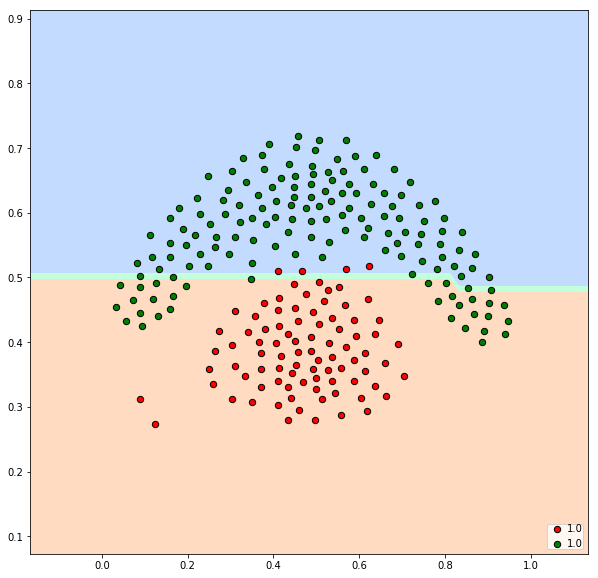

In [5]:
from sklearn import linear_model

# train model
model = linear_model.SGDClassifier(max_iter=1000, tol=1e-5, random_state=seed)
evaluate(model)

# visualize decision borders
show_decision_borders(model, X, Y)

<h2>Neural Network classifier</h2>

-- Training data --
Accuracy: 100.00%
Confusion Matrix:
[[ 87   0]
 [  0 153]]

-- 10-fold CV --
Average accuracy: 98.33%
Confusion Matrix:
[[ 84   3]
 [  1 152]]


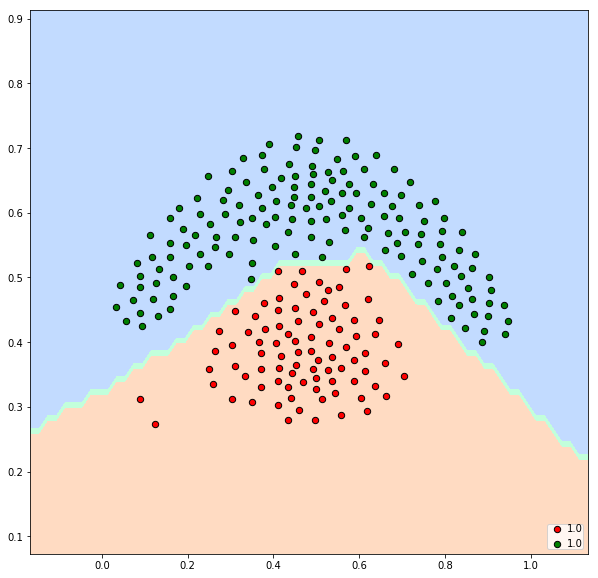

In [6]:
from sklearn.neural_network import MLPClassifier

# train model
model = MLPClassifier(max_iter=2000, random_state=seed, solver='lbfgs')
evaluate(model)

# visualize decision borders
show_decision_borders(model, X, Y)

<h2>Decision Tree classifier</h2>

-- Training data --
Accuracy: 100.00%
Confusion Matrix:
[[ 87   0]
 [  0 153]]

-- 10-fold CV --
Average accuracy: 98.33%
Confusion Matrix:
[[ 86   1]
 [  3 150]]


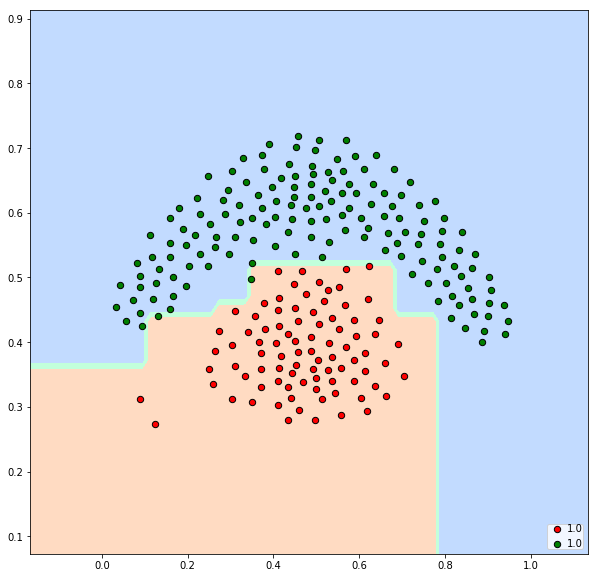

In [7]:
from sklearn.tree import DecisionTreeClassifier

# train model
model = DecisionTreeClassifier(random_state=seed)
evaluate(model)

# visualize decision borders
show_decision_borders(model, X, Y)

<h2>SVM classifier</h2>

-- Training data --
Accuracy: 99.58%
Confusion Matrix:
[[ 86   1]
 [  0 153]]

-- 10-fold CV --
Average accuracy: 98.75%
Confusion Matrix:
[[ 86   1]
 [  2 151]]


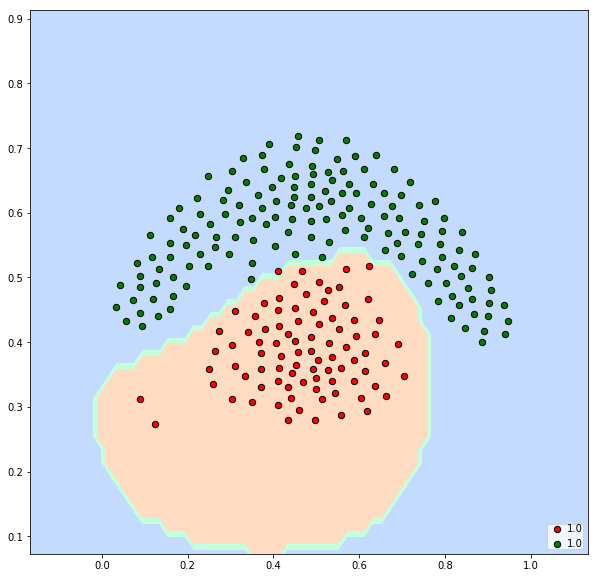

In [9]:
from sklearn import svm

# train model
model = svm.SVC(random_state=seed, C=100.0, gamma="scale")
evaluate(model)

# visualize decision borders
show_decision_borders(model, X, Y)

<h2>kNN classifier</h2>

-- Training data --
Accuracy: 99.58%
Confusion Matrix:
[[ 86   1]
 [  0 153]]

-- 10-fold CV --
Average accuracy: 98.75%
Confusion Matrix:
[[ 85   2]
 [  1 152]]


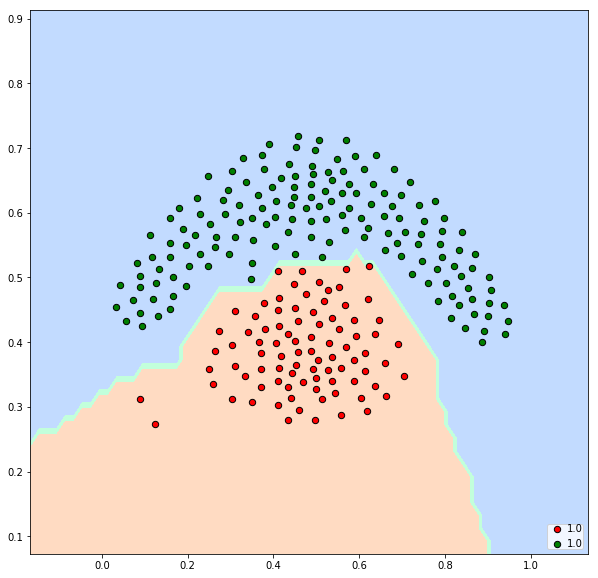

In [10]:
from sklearn.neighbors import KNeighborsClassifier

# train model
model = KNeighborsClassifier(n_neighbors=3)
evaluate(model)

# visualize decision borders
show_decision_borders(model, X, Y)

<h2>XGBoost classifier</h2>

-- Training data --
Accuracy: 100.00%
Confusion Matrix:
[[ 87   0]
 [  0 153]]

-- 10-fold CV --
Average accuracy: 98.75%
Confusion Matrix:
[[ 86   1]
 [  2 151]]


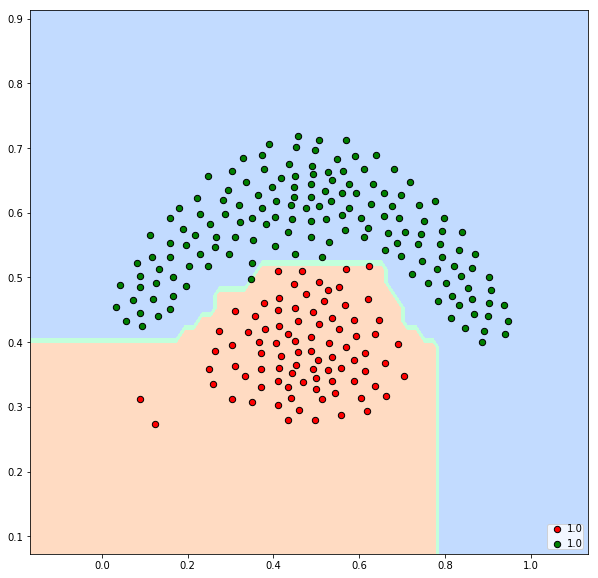

In [11]:
from xgboost import XGBClassifier

# Ignore deprecation warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# train model
model = XGBClassifier(random_state=seed)
evaluate(model)

# visualize decision borders
show_decision_borders(model, X, Y)

<h2>Plot attributes</h2>

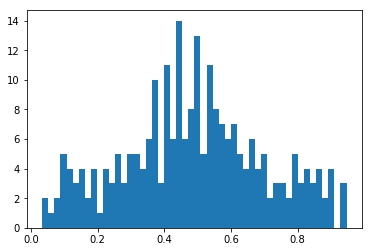

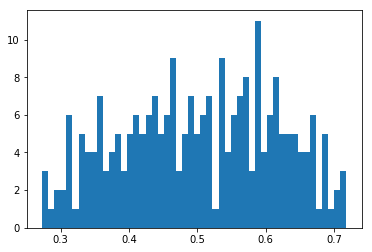

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(X[:,0], bins=50)
plt.show()
plt.hist(X[:,1], bins=50)
plt.show()